<a href="https://colab.research.google.com/github/geocarvalho/r-bioinfo-ds/blob/master/statquest/machine-learning/16_logistic_regression_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 16 - [Logistic Regression in R](https://www.youtube.com/watch?v=C4N3_XJJ-jU&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=16)

* Open the Heart Disease Dataset


In [83]:
url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
data <- read.csv(url, header=FALSE)
print(head(data))

  V1 V2 V3  V4  V5 V6 V7  V8 V9 V10 V11 V12 V13 V14
1 63  1  1 145 233  1  2 150  0 2.3   3 0.0 6.0   0
2 67  1  4 160 286  0  2 108  1 1.5   2 3.0 3.0   2
3 67  1  4 120 229  0  2 129  1 2.6   2 2.0 7.0   1
4 37  1  3 130 250  0  0 187  0 3.5   3 0.0 3.0   0
5 41  0  2 130 204  0  2 172  0 1.4   1 0.0 3.0   0
6 56  1  2 120 236  0  0 178  0 0.8   1 0.0 3.0   0


* Name the columns after the names that were listed on the UCI website

In [84]:
colnames(data) <- c(
"age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
"exang", "oldpeak", "slope", "ca", "thal", "hd")
print(head(data))

  age sex cp trestbps chol fbs restecg thalach exang oldpeak slope  ca thal hd
1  63   1  1      145  233   1       2     150     0     2.3     3 0.0  6.0  0
2  67   1  4      160  286   0       2     108     1     1.5     2 3.0  3.0  2
3  67   1  4      120  229   0       2     129     1     2.6     2 2.0  7.0  1
4  37   1  3      130  250   0       0     187     0     3.5     3 0.0  3.0  0
5  41   0  2      130  204   0       2     172     0     1.4     1 0.0  3.0  0
6  56   1  2      120  236   0       0     178     0     0.8     1 0.0  3.0  0


* The `str()` function, which describes the **str**ucture of the data, tells us that some of the columns are messed up;


In [85]:
str(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : num  1 1 1 1 0 1 0 0 1 1 ...
 $ cp      : num  1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : num  1 0 0 0 0 0 0 0 0 1 ...
 $ restecg : num  2 2 2 0 2 0 2 0 2 2 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : num  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : num  3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : Factor w/ 5 levels "?","0.0","1.0",..: 2 5 4 2 2 2 4 2 3 2 ...
 $ thal    : Factor w/ 4 levels "?","3.0","6.0",..: 3 2 4 2 2 2 2 2 4 4 ...
 $ hd      : int  0 2 1 0 0 0 3 0 2 1 ...


* Right now, **sex** is a number, but it's supposed to be a factor, where 0 represents "Female" and 1 represents "Male";

* **cp** (aka **c**hest **p**ain) is also supposed to be a factor, where levels 1-3 represent different types of pain and 4 represents no chest pain;

* **ca** and **thal** are correctly called factors, but one of the levels is "**?**" when we need it to be **NA**.

In [0]:
# Change the "?"s to NAs
data[data=="?"] <- NA

# Convert the 0s in $sex to F, for female and the 1s to M for male
data[data$sex == 0,]$sex <- "F"
data[data$sex == 1,]$sex <- "M"

# Convert the $sex column into a factor, and a bunch of other columns
data$sex <- as.factor(data$sex)
data$cp <- as.factor(data$cp)
data$fbs <- as.factor(data$fbs)
data$restecg <- as.factor(data$restecg)
data$exang <- as.factor(data$exang)
data$slope <- as.factor(data$slope)

* Since the **ca** column originally had a **?** in it, rather than **NA**, R thinks it's a column of strings. We correct that assumption by telling R that it's a column of integers and then we convert it to a factor.

In [0]:
data$ca <- as.integer(data$ca)
data$ca <- as.factor(data$ca)

# And the same thing to $thal

data$thal <- as.integer(data$thal)
data$thal <- as.factor(data$thal)

* The last thing we need to do to the data is make **hd** (aka **h**eart **d**isease) a factor that is easy on the eyes. Here I'm using a fancy trick with `ifelse()` to convert the **0**s to "**Healthy**" and the **1**s to "**Unhealthy**";

> We could have done a similar trick for **sex**, but I wanted to show you both ways to convert numbers to words.

In [0]:
data$hd <- ifelse(test=data$hd == 0, yes="Healthy", no="Unhealthy")
data$hd <- as.factor(data$hd)

* Once we're done fixing up the data, we check that we have made the appropriate changes with `str()`

In [89]:
str(data)

'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : Factor w/ 2 levels "F","M": 2 2 2 2 1 2 1 1 2 2 ...
 $ cp      : Factor w/ 4 levels "1","2","3","4": 1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 2 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 3 3 3 1 3 1 3 1 3 3 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 2 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : Factor w/ 3 levels "1","2","3": 3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : Factor w/ 4 levels "2","3","4","5": 1 4 3 1 1 1 3 1 2 1 ...
 $ thal    : Factor w/ 3 levels "2","3","4": 2 1 3 1 1 1 1 1 3 3 ...
 $ hd      : Factor w/ 2 levels "Healthy","Unhealthy": 1 2 2 1 1 1 2 1 2 2 ...


* Now we see how many samples (rows of data) have **NA** values.

In [90]:
nrow(data[is.na(data$ca) | is.na(data$thal),])

[1] 6

In [91]:
print(data[is.na(data$ca) | is.na(data$thal),])

    age sex cp trestbps chol fbs restecg thalach exang oldpeak slope   ca thal
88   53   F  3      128  216   0       2     115     0     0.0     1    2 <NA>
167  52   M  3      138  223   0       0     169     0     0.0     1 <NA>    2
193  43   M  4      132  247   1       2     143     1     0.1     2 <NA>    4
267  52   M  4      128  204   1       0     156     1     1.0     2    2 <NA>
288  58   M  2      125  220   0       0     144     0     0.4     2 <NA>    4
303  38   M  3      138  175   0       0     173     0     0.0     1 <NA>    2
           hd
88    Healthy
167   Healthy
193 Unhealthy
267 Unhealthy
288   Healthy
303   Healthy


* If we wanted to, we could impute values for the **NA**s using Random Forest or some other method. However, for this example, we'll just remove these samples.

In [92]:
print(nrow(data))
data <- data[!(is.na(data$ca) | is.na(data$thal)),]
print(nrow(data))

[1] 303
[1] 297


* Now we need to make sure that healthy and disease samples come from each gender (female and male);

* If only male samples have heart disease, we should probably remove all females from the model;

* We do this with the `xtabs()` function. We pass the data and use "model syntax" to select the columns in the data we want to build a table from


In [93]:
xtabs(~ hd + sex, data=data)

           sex
hd            F   M
  Healthy    71  89
  Unhealthy  25 112

* **Healthy** and **Unhealthy** patients are both represented by a lot of female and male samples.

* Now let's verify that all 4 levels of Chest Pain (**cp**) were reported by a bunch of patients

In [94]:
xtabs(~ hd + cp, data=data)

           cp
hd            1   2   3   4
  Healthy    16  40  65  39
  Unhealthy   7   9  18 103

* .. and then we do the same thing for all of the boolean and categorical variables that we're using to predict heart disease

In [95]:
xtabs(~ hd + fbs, data=data)

           fbs
hd            0   1
  Healthy   137  23
  Unhealthy 117  20

In [96]:
xtabs(~ hd + restecg, data=data)

           restecg
hd           0  1  2
  Healthy   92  1 67
  Unhealthy 55  3 79

* For **restecg**, only 4 patients represent level 1. This could, potentially, get in the way of  finding the best fitting line (just leave it in and see what happens).

* And then we just keep looking at the remaining variables to make sure that they are all represented by a number of patients.

In [97]:
xtabs(~ hd + exang, data=data)

           exang
hd            0   1
  Healthy   137  23
  Unhealthy  63  74

In [98]:
xtabs(~ hd + slope, data=data)

           slope
hd            1   2   3
  Healthy   103  48   9
  Unhealthy  36  89  12

In [99]:
xtabs(~ hd + ca, data=data)

           ca
hd            2   3   4   5
  Healthy   129  21   7   3
  Unhealthy  45  44  31  17

In [100]:
xtabs(~ hd + thal, data=data)

           thal
hd            2   3   4
  Healthy   127   6  27
  Unhealthy  37  12  88

 ## Let's start with a super simple model
 
 * We'll try to predict heart disease using only the gender of each patient.

In [0]:
logistic <- glm(hd ~ sex, data=data, family="binomial")

* Here's our call to `glm()`, the function that performs **G**eneralized **L**inear **M**odels.

1. We use formula syntax to specify that we want to use sex to predict heart disease (**hd**);
2. Then we specify the data that we're using for the model;
3. Lastly, we specify that we want the **binomial** family of generalized linear models. This makes the `glm()` function do Logistic Regression, as apposed to some other type of generalized linear model.

* We then use the `summary()` function to get details about the logistic regression.

In [102]:
summary(logistic)


Call:
glm(formula = hd ~ sex, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2765  -1.2765  -0.7768   1.0815   1.6404  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.0438     0.2326  -4.488 7.18e-06 ***
sexM          1.2737     0.2725   4.674 2.95e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 409.95  on 296  degrees of freedom
Residual deviance: 386.12  on 295  degrees of freedom
AIC: 390.12

Number of Fisher Scoring iterations: 4


* The first line has the original call to the `glm()` function;

* The second line gives a summary of the deviance residuals;

> They look good since they're close to being centered on 0 and are roughly symmetrical ([Deviance residuals statquest](https://www.youtube.com/watch?v=JC56jS2gVUE));

* The third line are the coefficients, they correspond to the following model:

$heart\ disease = -1.0438 + 1.2737 \times the\ patient\ is\ male$

> $the\ patient\ is\ male$ is equal to 0 when the patient is female and 1 when the patient is male;

> the first term (-1.0438) is the $log(odds)$ of a female having heart disease and the second term (1.2737) indicates the increase in the $log(odds)$ that a male has of having heart disease.

> In other words, the second term is the $log(odds\ ratio)$ of the $odds$ that a male will have heart disease over the $odds$ that a female will have heart disease.

> the `Std. Error` and `z value` shows how the Wald's test was computed for both coefficients and the `Pr(>|z|)` are the p-values (that are both statistically significant).

* A small p-value alone isn't interesting, we also want a **large effect sizes**, and that's what the $log(odds)$ and $log(odds\ ratio)$  tells us.

> More about coefficients and the Wald's test in [Odds and Log(Odds)](https://www.youtube.com/watch?v=ARfXDSkQf1Y), [Odds Ratios and Log(Odds Ratios)](https://www.youtube.com/watch?v=8nm0G-1uJzA). and [Logistic Regression coefficients](https://www.youtube.com/watch?v=vN5cNN2-HWE).

* The forth line is the default dispersion parameter used for this logistic regression. When we do "normal" linear regression, we estimate both the mean and the variance from the data. In contrast, with logistic regression, we estimate the mean of the data, and the variance is derived from the mean.

> Since we're not estimating the variance from the data (and, instead, just deriving it from the mean), it's possible that the variance is underestimated. If so, you can adjust the dispersion parameter in the `summary()` command.

* In the fifth line we have the Null Deviance and the Residual Deviance. These can be used to compare models, compute $R^2$ and an overall p-value.

> [Logistic regression $R^2$ and its p-value](https://www.youtube.com/watch?v=xxFYro8QuXA) and [Saturated models and Deviance statistics](https://www.youtube.com/watch?v=9T0wlKdew6I&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=15)

* In the sixth line we have the AIC (**A**kaike **I**nformation **C**riterion), which in this context is just the Residual Deviance adjusted for the number of parameters in the model. It can be used to compare one model to another.

* Lastly, we have the number of Fisher Scoring iterations, which just tells us how quickly the `glm()` function converged on the maximum likekihood estimates for coefficients.

> More details about how the coefficients were estimated in [Logistic Regression fitting a line with Maximum Likelihood](https://www.youtube.com/watch?v=BfKanl1aSG0)


## Fancy Model that uses all of the variables to predict heart disease



In [0]:
logistic <- glm(hd ~ ., data=data, family="binomial")

* This formula syntax, `hd ~ .`, means that we want to model heart disease (**hd**) using all of the remaining variables in our `data.frame` called "data"

In [104]:
summary(logistic)


Call:
glm(formula = hd ~ ., family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0490  -0.4847  -0.1213   0.3039   2.9086  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.253978   2.960399  -2.113 0.034640 *  
age         -0.023508   0.025122  -0.936 0.349402    
sexM         1.670152   0.552486   3.023 0.002503 ** 
cp2          1.448396   0.809136   1.790 0.073446 .  
cp3          0.393353   0.700338   0.562 0.574347    
cp4          2.373287   0.709094   3.347 0.000817 ***
trestbps     0.027720   0.011748   2.359 0.018300 *  
chol         0.004445   0.004091   1.087 0.277253    
fbs1        -0.574079   0.592539  -0.969 0.332622    
restecg1     1.000887   2.638393   0.379 0.704424    
restecg2     0.486408   0.396327   1.227 0.219713    
thalach     -0.019695   0.011717  -1.681 0.092781 .  
exang1       0.653306   0.447445   1.460 0.144267    
oldpeak      0.390679   0.239173   1.633 0.102373   

* We see that **$age** isn't a useful predictor because it has a large p-value. However, the median age in our dataset, was 56, so most of the folks were pretty old and that explains why it wasn't very useful;

* Gender is still a good predictor;

* In the end, we see that the Residual Deviance and the AIC are both much smaller for this fancy model than they were for the simple model, when we only used gender to predict heart disease.

* If we want to calculate **McFadden's Pseudo $R^2$**, we can pull the **log-likelihood of the null model** out of the **logistic** variable by getting the value for the **null deviance** and dividing by -2; and we can pull the **log-likelihood for the fancy model** out of the **logistic** variable by getting the value for the **residual deviance** and dividing by -2.

In [0]:
ll.null <- logistic$null.deviance/-2
ll.proposed <- logistic$deviance/-2

* Then we just do the math and we end up with a Pseudo $R^2$=0.55. This can be interpreted as the overall effect size.


In [109]:
(ll.null - ll.proposed) / ll.null

[1] 0.5533531

* And we can use those same log-likelihoods to calculate a p-value for that $R^2$ using a chi-square distribution

In [110]:
1 - pchisq(2*(ll.proposed - ll.null), df=(length(logistic$coefficients)-1))

[1] 0

* In this case, the p-value is tiny, so the $R^2$ value isn't due to dumb luck.

> More details on the $R^2$ and $p-value$ can be found in [Logistic regression $R^2$ and its p-value](https://www.youtube.com/watch?v=xxFYro8QuXA)

* Lastly, we can draw a graph that shows the predicted probabilities that each patient has heart disease along with their actual heart disease status;


1. Create a new `data.frame` that contains the probabilities of having heart disease along with the actual heart disease status.

In [0]:
predicted.data <- data.frame(
probability.of.hd=logistic$fitted.values, hd=data$hd)

2. We sort the `data.frame` from low probabilities to high probabilities

In [0]:
predicted.data <- predicted.data[
  order(predicted.data$probability.of.hd, decreasing=FALSE),
]

3. We add a new column to the `data.frame` that has **rank** of each sample, from low probability to high probability.

In [0]:
predicted.data$rank <- 1:nrow(predicted.data)

4. Load `ggplot2`and `cowplot` (nice looking defaults to `ggplot2`)

In [115]:
library(ggplot2)
install.packages('cowplot')
library(cowplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



5. Call `ggplot2` and use `geom_point()` to draw the data

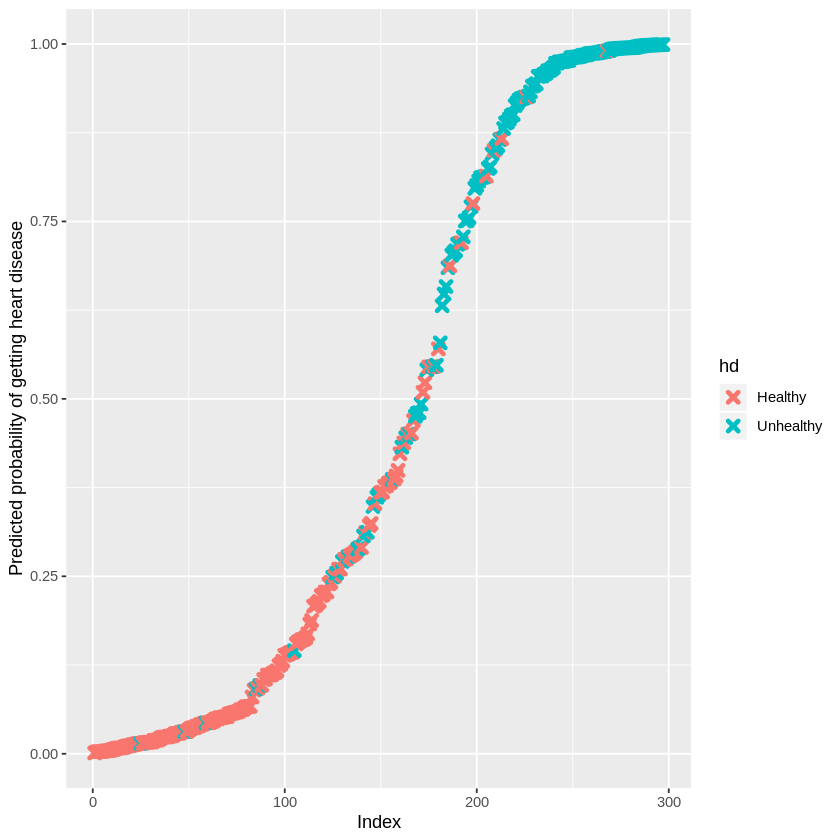

In [117]:
ggplot(data=predicted.data, aes(x=rank, y=probability.of.hd)) +
geom_point(aes(color=hd), alpha=1, shape=4, stroke=2) +
xlab("Index") +
ylab("Predicted probability of getting heart disease")

In [0]:
# If you want to save as PDF
# ggsave('heart_disease_probabilities.pdf')

 * Most of the patients with heart disease (the ones in **turquoise**), are predicted to have a **high** probability of having heart disease;
 
 * While, most of the patients without heart disease (the ones in **salmon**), are predicted to have a **low** probability of having heart disease.